# **Advertising Sales Channel Prediction Model**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


**Getting Started**

**Problem Statement**

Build a model which predicts sales based on the money spent on different platforms for marketing.

**Data**

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.



In [3]:
#Importing the python libraries and packages

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Reading the CSV file of the dataset
#Pandas read_csv() function imports a CSV file (in our case, ‘Advertising.csv’) to DataFrame format.

df = pd.read_csv("/content/drive/MyDrive/Python_Datasets/Advertising.csv")

In [5]:
#Examining the Data
#After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods.

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#The .info() method will give you a concise summary of the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Observation** : We have float type value in all independent variables and sales is our target variable .

In [7]:
#The shape of the dataset

df.shape

(200, 5)

**Observation** : This shows that our dataset contains 200 rows i.e. instances of Advertising Sales Channel and 5 columns i.e. the specifications like TV , radio , newspaper and sales etc.

In [8]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [9]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df.columns)
shape=df.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))


Features Present in the Dataset: 
 Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Total Number of Rows :  200
Total Number of Features :  5


Data Types of Features :
 Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

Dataset contains any NaN/Empty cells :  False

Total number of empty rows in each feature:
 Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64 


Total number of unique values in each feature:
Number of unique values of Unnamed: 0 : 200
Number of unique values of TV : 190
Number of unique values of radio : 167
Number of unique values of newspaper : 172
Number of unique values of sales : 121


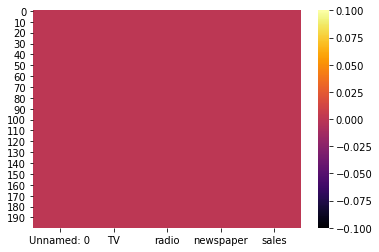

In [10]:
#Checking of null values in our dataset by passing a heatmap function.

sns.heatmap(df.isnull(),cmap='inferno')

**Observation** : There are no null values present in the dataset .

# ***EDA (Exploratory Data Analysis)***

**Univariate Analysis**

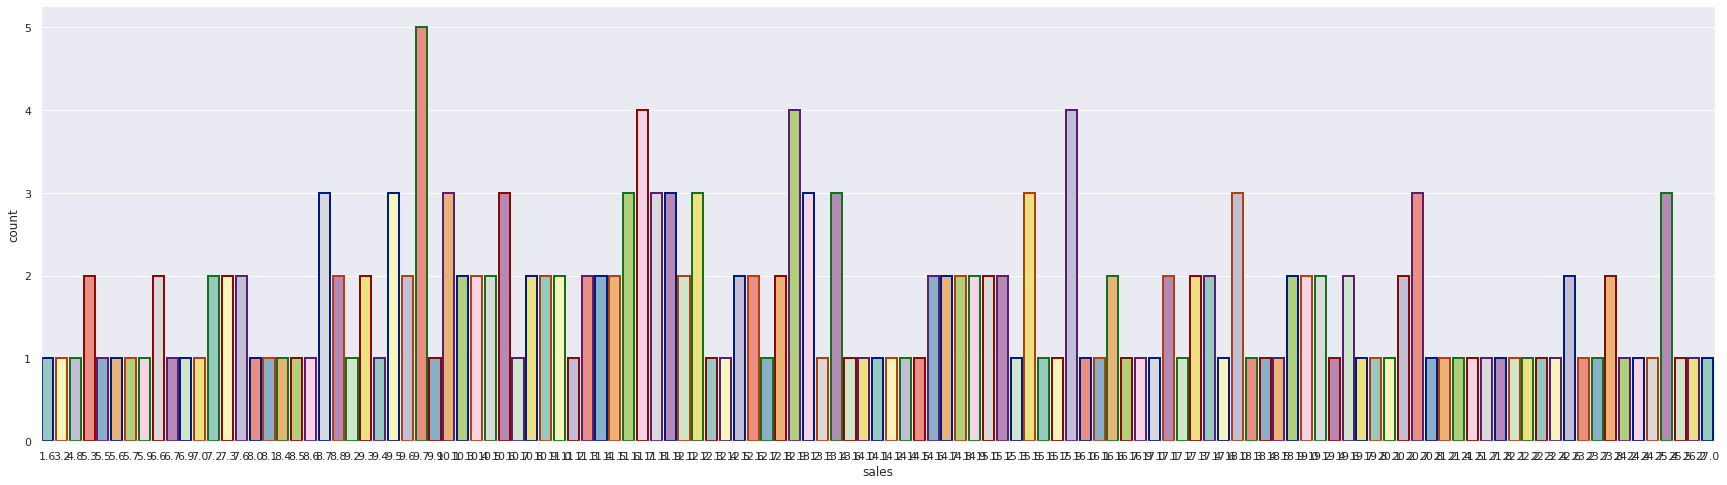

In [11]:
plt.figure(figsize=(30,8))
sns.set_theme(style="darkgrid")
sns.countplot(df['sales'],linewidth=2,edgecolor=sns.color_palette("dark", 5),palette="Set3")

**Observation** : Data is not Normally Distributed .

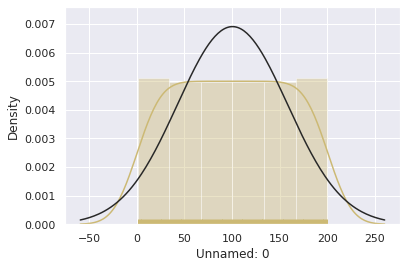

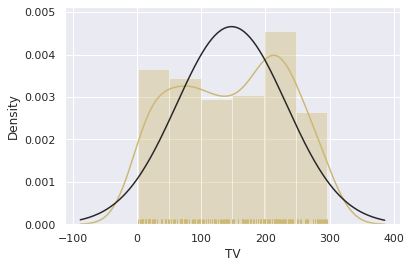

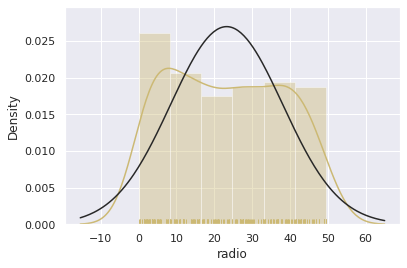

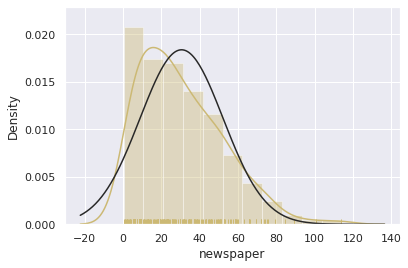

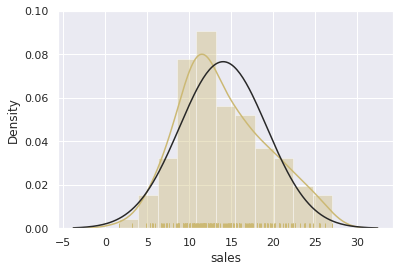

In [12]:
# Making of distplot to show the skewness in different columns

from scipy.stats import norm
for g in df.describe().columns:
    sns.distplot(df[g] , rug=True , color = 'y' , fit=norm)
    plt.show()

**Observation** : It looks like all specification of abalone are close to normal distribution .

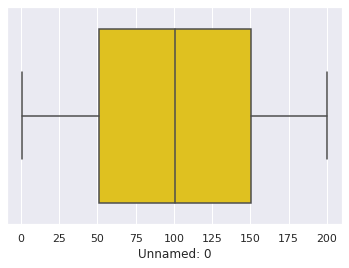

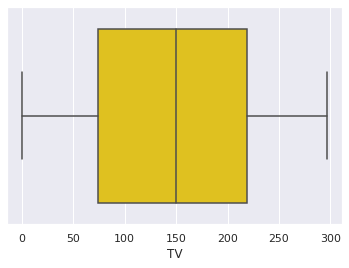

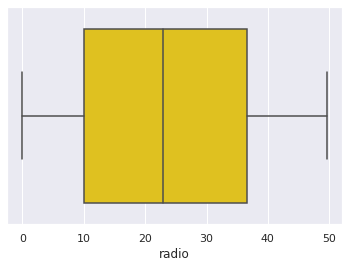

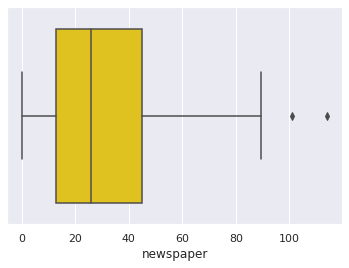

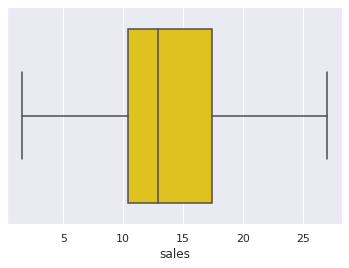

In [13]:
from scipy.stats import norm
for g in df.describe().columns:
    sns.boxplot(df[g] ,color='gold')
    plt.show()

**Observation** : It looks like there are some outliers present in newsapaper column , otherwise all other specifications are fine .

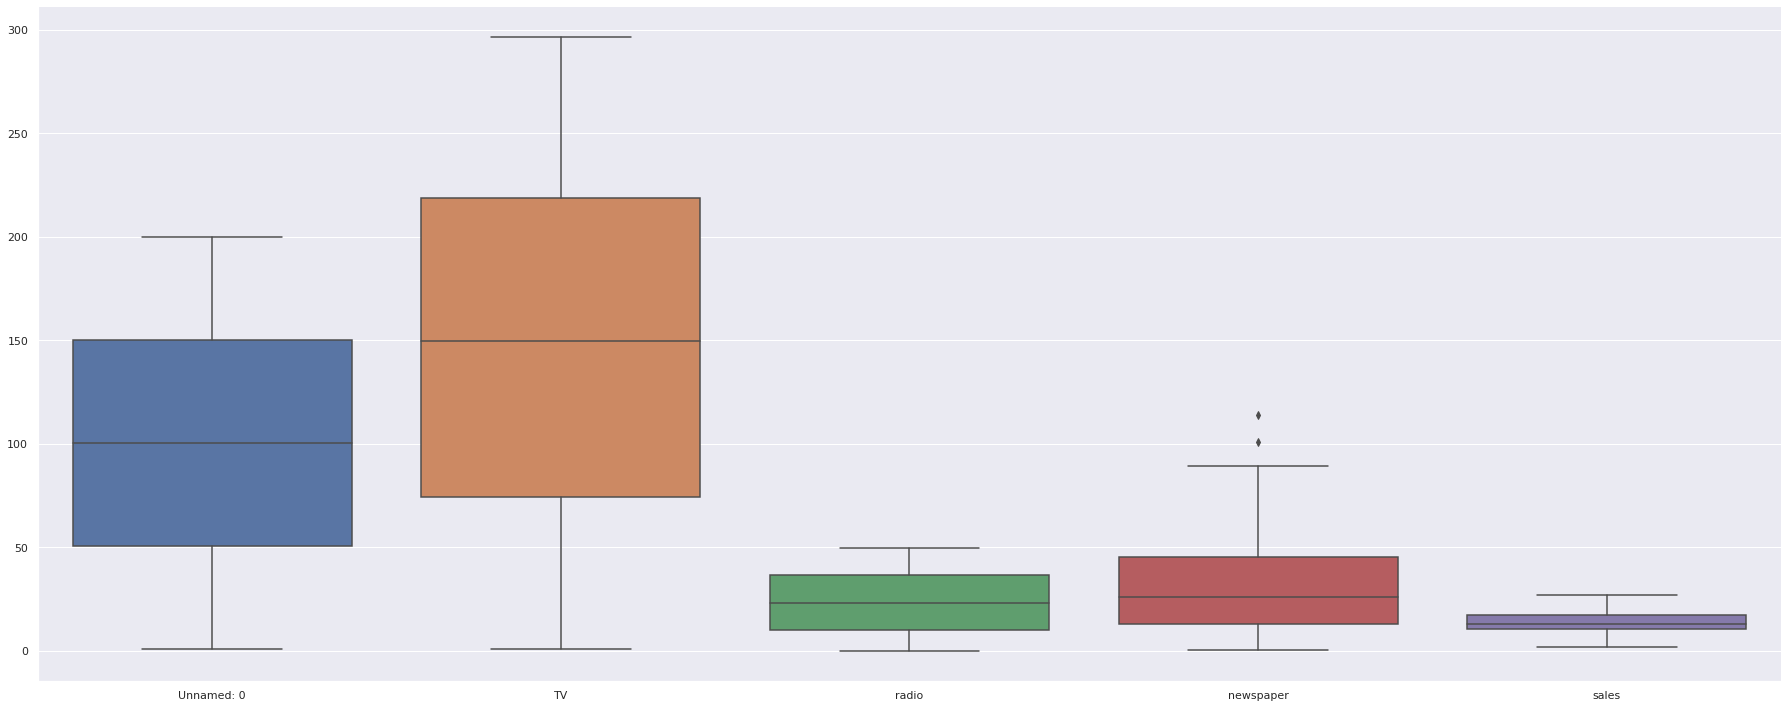

In [14]:
sns.factorplot(data=df,kind='box',size=10,aspect=2.5)

**Observation** : There are 2 outliers present in newspaper column of the dataset

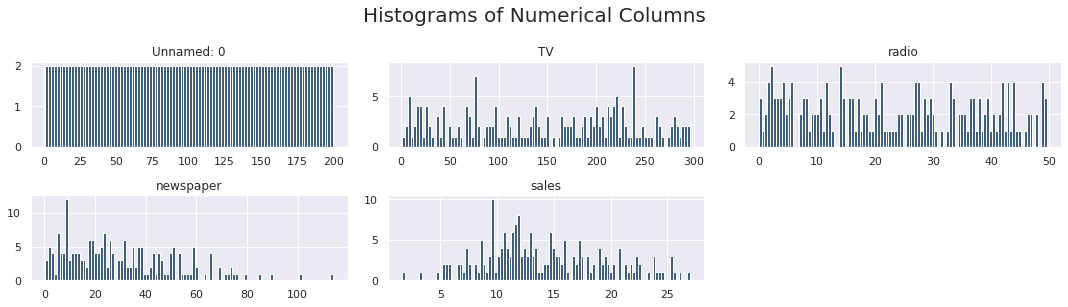

In [15]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Bivariate Analysis**

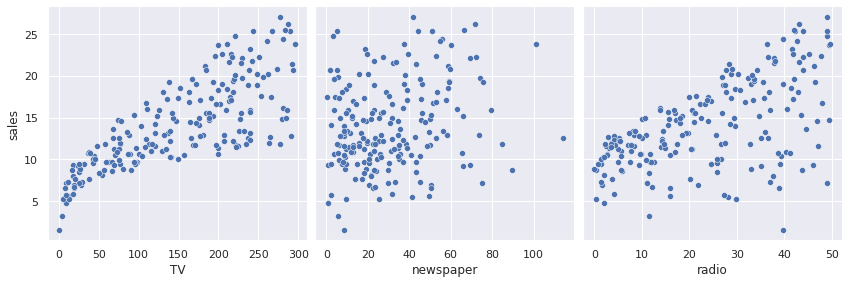

In [16]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

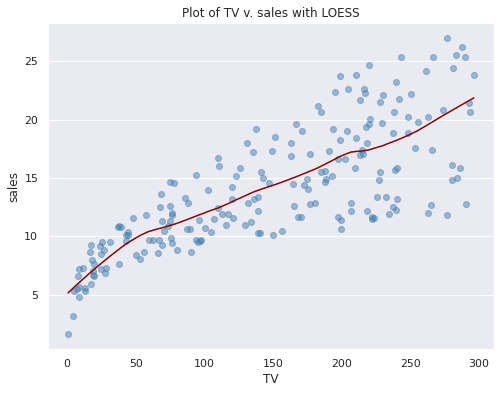

In [17]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):
    import statsmodels.api as sm
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(8, 6))
    axes = figure.add_subplot(1, 1, 1)
    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs(0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="steelblue", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")
    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    axes.xaxis.grid(False)
    plt.show()
lowess_scatter(df, "TV", "sales")

**Observation** : We can see the plot kind of looks like exponential function with monotonically increasing relationship

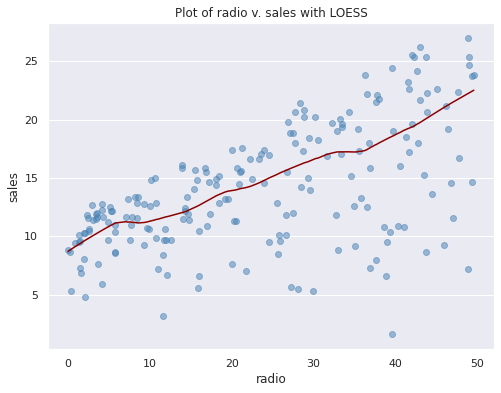

In [18]:
lowess_scatter(df, "radio", "sales")

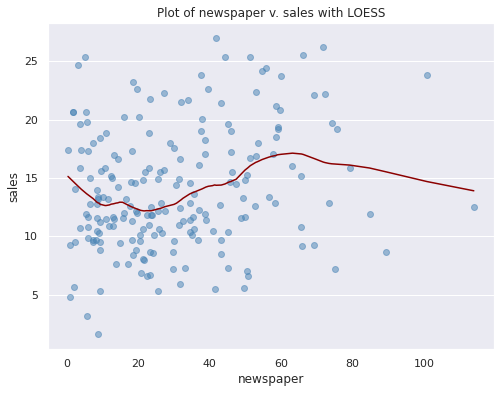

In [19]:
lowess_scatter(df, "newspaper", "sales")

**Observation** : Indeed, we see an exponential curve

**Checking Correlation between variables** 

In [20]:
cor=df.corr()

In [21]:
cor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


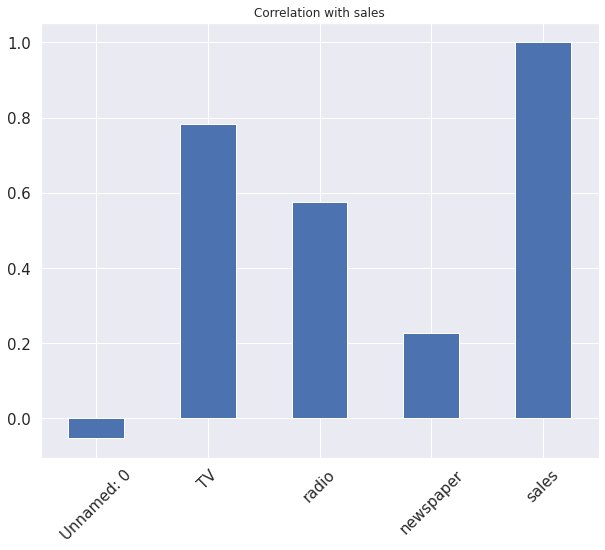

In [22]:
#Correlation with sales with respect to attributes

df.corrwith(df.sales).plot.bar(
        figsize = (10, 8), title = "Correlation with sales", fontsize = 15,
        rot = 45, grid = True)

**Plotting Heatmap**

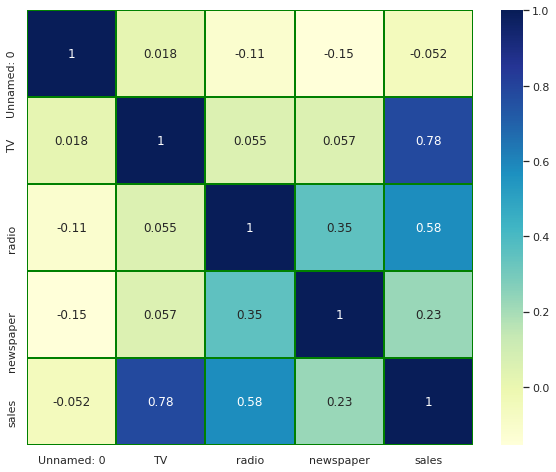

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,linewidths=1,linecolor='green',cmap="YlGnBu")
plt.show()

**Observation** : As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

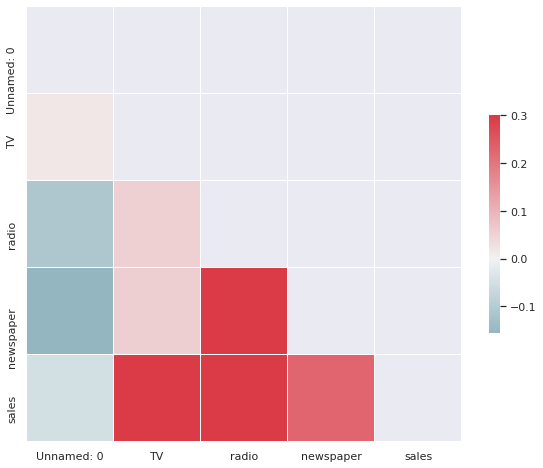

In [24]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
#Dropping Irrelevant columns

df.drop(['Unnamed: 0'],axis=1, inplace=True)

# **Data Cleaning**

**1.Checking Null Values**

In [26]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Observation** : There are no null values present in the dataset .

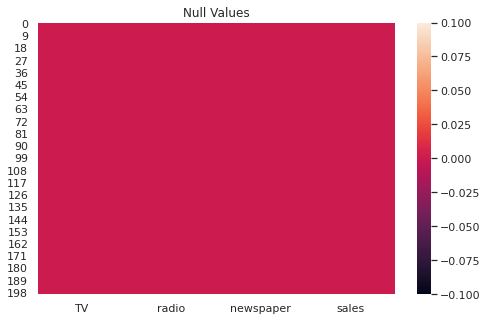

In [27]:
#Plotting Null Values

plt.figure(figsize=[8,5])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

**2.Checking for Outliers**

In [28]:
#Compute Outliers using zscore method

from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1)]

In [29]:
df.shape

(200, 4)

In [30]:
new_df.shape

(198, 4)

In [31]:
#Computing Outliers

((200-198)/200)*100

1.0

**Observation** :There will be a loss of 1% of data from the dataset which could be affordable .

**3.Checking for Skewness**

In [32]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

**Observation** : Newspaper variable have more skewness . so lets remove it

In [33]:
#Using PowerTransformer to remove skewness

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
for i in new_df.skew().index[1:]:
    if new_df.skew().loc[i]>0.55:
        new_df[i]=pt.fit_transform(new_df[i].values.reshape(-1,1))
    if new_df.skew().loc[i]<-0.55:
        new_df[i]=pt.fit_transform(new_df[i].values.reshape(-1,1))
    else:
        new_df[i]=new_df[i]

In [34]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

**Observation** : The skewness has been removed and in range between -0.5 to 0.5 . hance data is ready for training .

**Split Data and Target**

In [35]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the Happiness Score of the World Happiness Report, we will drop the ‘sales’ column.

X = new_df.drop(['sales'], axis=1)
y = new_df['sales'].astype('int')

In [36]:
X

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622
...,...,...,...
195,38.2,3.7,-0.687435
196,94.2,4.9,-1.146090
197,177.0,9.3,-1.314437
198,283.6,42.0,1.517395


In [37]:
y

0      22
1      10
2       9
3      18
4      12
       ..
195     7
196     9
197    12
198    25
199    13
Name: sales, Length: 198, dtype: int64

**Scaling of Data**

Here we need to standardize them so that we can use the data properly. To do this, we need to apply the Scaling process to the data. Scikit-Learn's "StandardScaler" class can be used for this process:

In [38]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [39]:
X

,TV,radio,newspaper
0,0.783202,0.762097,0.878788
1,0.149539,0.792339,0.703678
2,0.056333,0.925403,0.879435
3,0.514851,0.832661,0.806215
4,0.614886,0.217742,0.805502
...,...,...,...
193,0.128030,0.074597,0.359758
194,0.319222,0.098790,0.255878
195,0.601912,0.187500,0.217749
196,0.965859,0.846774,0.859129


In [40]:
new_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,1.604196,22.1
1,44.5,39.3,0.831044,10.4
2,17.2,45.9,1.607052,9.3
3,151.5,41.3,1.283768,18.5
4,180.8,10.8,1.280622,12.9


**Preparation of Test and Train Data**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=6)

# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

In [42]:
#Fitting Random Forest Regressor to the Training set

from sklearn.ensemble import RandomForestRegressor

Regressor = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = None,)
Regressor.fit(X, y)
features_label = df.columns
importances = Regressor.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) TV                             0.629527
 2) radio                          0.361692
 3) newspaper                      0.008782


**Feature Importance**

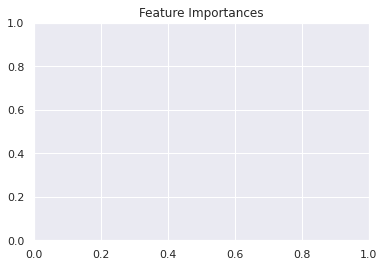

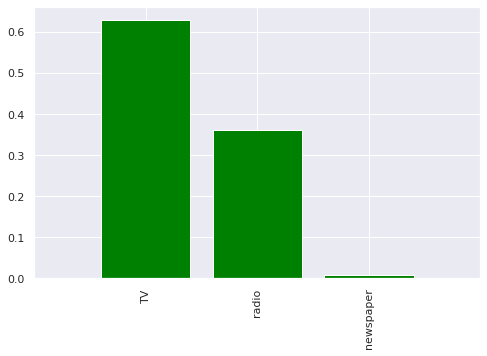

In [43]:
plt.title('Feature Importances')
plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# **Building Model**

In [44]:
#Importing Packages

from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

**1.Linear Regression**

In [76]:
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()

LRmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
#Predicting and estimating the result

y_pred_lr = LRmodel.predict(X_test)
print("Linear Regression Report: \n\n", LinearRegression(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(LRmodel.score(X_test, y_test)*100, 2)))

Linear Regression Report: 

 LinearRegression(copy_X=True,
                 fit_intercept=57     13
4      12
171    14
13      9
94     11
119     6
117     9
11     17
39     21
152    16
175    27
53     21
20     18
93     22
12      9
133    19
115    12
196     9
118    15
99     17
50     11
123    15
122    11
130     1
106     7
72      8
62     15
84     21
19     14
55     23
31     11
6      11
54     20
0      22
113    15
100    11
185    22
105    19
2       9
65      9
114    14
172     7
17     24
60      8
139    20
98     25
73     11
170     8
90     11
169    15
36     25
151    11
160    14
182     8
110    13
5       7
162    14
102    14
82     11
180    10
Name: sales, dtype: int64,
                 n_jobs=None,
                 normalize=array([12.210...
       10.07186653, 16.06644673, 20.2636236 , 13.61648937, 20.91017994,
       10.89658686, 11.39746576, 19.63303044, 20.05601086, 15.68950405,
       13.20702695, 20.2568308 , 17.64314565, 12.24996348,  7.249

In [78]:
# The coefficients
print('Coefficients: \n', LRmodel.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, LRpred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, LRpred))

Coefficients: 
 [12.89394292  9.58937126  0.24256044]
Mean squared error: 3.91
Coefficient of determination: 0.88


**2.Ridge Model**

In [47]:
from sklearn.linear_model import  Ridge

Rmodel = Ridge()
Rmodel.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
#Predicting and estimating the result

y_pred_rm = Rmodel.predict(X_test)
print("Ridge Model Report : \n\n", Ridge(y_test, y_pred_rm))
print("Test Accuracy: {}%".format(round(Rmodel.score(X_test, y_test)*100, 2)))

Ridge Model Report : 

 Ridge(alpha=57     13
4      12
171    14
13      9
94     11
119     6
117     9
11     17
39     21
152    16
175    27
53     21
20     18
93     22
12      9
133    19
115    12
196     9
118    15
99     17
50     11
123    15
122    11
130     1
106     7
72      8
62     15
84     21
19     14
55     23
31     11
6      11
54     20
0      22
113    15
100    11
185    22
105    19
2       9
65      9
114    14
172     7
17     24
60      8
139    20
98     25
73     11
170     8
90     11
169    15
36     25
151    11
160    14
182     8
110    13
5       7
162    14
102    14
82     11
180    10
Name: sales, dtype: int64,
      copy_X=True,
      fit_intercept=array([12.26980538, 12.7768859 , 13.8714022...
       13.28234766, 19.69059047, 17.36463711, 12.40190081,  7.60715977,
       14.91585148,  7.69289436, 21.97793192,  5.88007248, 18.48764847,
       22.77932037,  9.67488161,  7.42640652,  9.59337455, 16.67493899,
       21.85403977,  9.88555309, 13

**3.Support Vector Regressor**

In [49]:
from sklearn.svm import SVR

SVRmodel = SVR()
SVRmodel.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
#Predicting and estimating the result

y_pred_svr = SVRmodel.predict(X_test)
print("Support Vector Regressor Report : \n\n", SVR(y_test, y_pred_svr))
print("Test Accuracy: {}%".format(round(SVRmodel.score(X_test, y_test)*100, 2)))

Support Vector Regressor Report : 

 SVR(C=1.0, cache_size=200, coef0=0.0,
    degree=array([13.01323409, 12.86663979, 14.56255639,  9.42091663, 10.7723601 ,
        7.38578832,  7.9960908 , 16.69944382, 21.022513  , 16.1356    ,
       20.95184618, 19.88534952, 18.11525891, 20.02795542,  9.40320712,
       19.9060742 , 12.05152616,  8.95939336, 15.25449759, 17.34454299,
       11.30124859, 15.18289042, 11.30747629,  8.64788522,  7.36129366,
        8.77393113, 14.639...
    epsilon=0.1, gamma='scale',
    kernel=57     13
4      12
171    14
13      9
94     11
119     6
117     9
11     17
39     21
152    16
175    27
53     21
20     18
93     22
12      9
133    19
115    12
196     9
118    15
99     17
50     11
123    15
122    11
130     1
106     7
72      8
62     15
84     21
19     14
55     23
31     11
6      11
54     20
0      22
113    15
100    11
185    22
105    19
2       9
65      9
114    14
172     7
17     24
60      8
139    20
98     25
73     11
170     8
9

**4.Gradient Boosting Regressor**

In [51]:
from sklearn.ensemble import  GradientBoostingRegressor

GBRmodel = GradientBoostingRegressor()
GBRmodel.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
#Predicting and estimating the result

y_pred_gbr = GBRmodel.predict(X_test)
print("Gradient Boosting Regressor Report : \n\n", GradientBoostingRegressor(y_test, y_pred_gbr))
print("Test Accuracy: {}%".format(round(GBRmodel.score(X_test, y_test)*100, 2)))

Gradient Boosting Regressor Report : 

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None,
                          learning_rate=array([12.86802602, 11.69336278, 14.68231611,  9.87438748, 11.91013478,
        6.58565538,  8.53321414, 16.63253264, 20.33423479, 16.33969004,
       25.18182056, 20.68518425, 18.72410637, 21.58175218,  8.65712155,
       19.6115458 , 12.93333152,  9.65051932, 15.89914519, 16.8784651 ,
       10.98126431...
180    10
Name: sales, dtype: int64,
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                 

**5.Random Forest Regressor**

In [53]:
from sklearn.ensemble import  RandomForestRegressor

RFRmodel = RandomForestRegressor()
RFRmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
#Predicting and estimating the result

y_pred_rfr = RFRmodel.predict(X_test)
print("Random Forest Regressor Report : \n\n", RandomForestRegressor(y_test, y_pred_rfr))
print("Test Accuracy: {}%".format(round(RFRmodel.score(X_test, y_test)*100, 2)))

Random Forest Regressor Report : 

 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                      criterion=array([12.83, 11.98, 14.63,  9.35, 11.85,  6.15,  8.08, 16.81, 20.23,
       16.06, 24.43, 20.78, 18.5 , 20.25,  7.97, 19.67, 13.02,  9.09,
       15.99, 16.7 , 11.15, 15.35, 10.57,  5.16,  6.66,  7.87, 14.71,
       21.86, 14.97, 21.91, 12.16, 10.78, 19.77, 19.95, 15.85, 11.74,
       21.77, 17.11,  7.68,  9.29, 13.01,  6.5 , 21.41,  8.04, 20.57,
       24.31, 10.91,  8.98, 11.01, 12.7...
                      n_estimators=57     13
4      12
171    14
13      9
94     11
119     6
117     9
11     17
39     21
152    16
175    27
53     21
20     18
93     22
12      9
133    19
115    12
196     9
118    15
99     17
50     11
123    15
122    11
130     1
106     7
72      8
62     15
84     21
19     14
55     23
31     11
6      11
54     20
0      22
113    15
100    11
185    22
105    19
2       9
65      9
114    14
172     7
17     24
60      8
139    20
9

**6.Decision Tree Regressor**

In [55]:
from sklearn.tree import DecisionTreeRegressor

DTRmodel = DecisionTreeRegressor()
DTRmodel.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
#Predicting and estimating the result

y_pred_dt = DTRmodel.predict(X_test)
print("Decision Tree Regressor Report : \n\n", DecisionTreeRegressor(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(DTRmodel.score(X_test, y_test)*100, 2)))

Decision Tree Regressor Report : 

 DecisionTreeRegressor(ccp_alpha=0.0,
                      criterion=57     13
4      12
171    14
13      9
94     11
119     6
117     9
11     17
39     21
152    16
175    27
53     21
20     18
93     22
12      9
133    19
115    12
196     9
118    15
99     17
50     11
123    15
122    11
130     1
106     7
72      8
62     15
84     21
19     14
55     23
31     11
6      11
54     20
0      22
113    15
100    11
185    22
105    19
2       9
65      9
114    14
172     7
17     24
60      8
139    20
98     25
73     11
170     8
90     11
169    15
36     25
151    11
160    14
182     8
110    13
5       7
162    14
102    14
82     11
180    10
Name: sales, dtype: int64,
                      max_depth=None, max_features=None...
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None,
                      splitter=

### **Computing Cross Validation**

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
print("1.LinearRegressor :",cross_val_score(LRmodel,X,y,cv=5).mean())

1.LinearRegressor : 0.8815483982672487


In [59]:
print("2.Ridge Model :",cross_val_score(Rmodel,X,y,cv=5).mean())

2.Ridge Model : 0.8792004866863177


In [60]:
print("3.Support Vector Regressor :",cross_val_score(SVRmodel,X,y,cv=5).mean())

3.Support Vector Regressor : 0.9123937548209543


In [61]:
print("4.Gradient Boosting Regressor :",cross_val_score(GBRmodel,X,y,cv=5).mean())

4.Gradient Boosting Regressor : 0.9721922648317142


In [62]:
print("5.Random Forest Regressor :",cross_val_score(RFRmodel,X,y,cv=5).mean())

5.Random Forest Regressor : 0.9706180719209663


In [63]:
print("6.Decision Tree Regressor :",cross_val_score(DTRmodel,X,y,cv=5).mean())

6.Decision Tree Regressor : 0.9447678272355837


**Observation** : I came to a conclusion that "**Linear Regression**" is the best model to be fitted with prediction for Advertising Sales Channel Prediction Model .

**Hyper parameter tuning**

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameter={'n_jobs':np.arange(-1,1),
           'fit_intercept':['bool'],
           'normalize' : ['bool']}

In [66]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [67]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': ['bool'], 'n_jobs': array([-1,  0]),
                         'normalize': ['bool']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
GCV.best_params_

{'fit_intercept': 'bool', 'n_jobs': -1, 'normalize': 'bool'}

In [69]:
Final_mod = LinearRegression(fit_intercept = 'bool', n_jobs = -1, normalize = 'bool')
Final_mod.fit(X_train,y_train)
LRpred=Final_mod.predict(X_test)

#Checking the R-squared on the test 

r_squared = r2_score(y_test, LRpred)
print(r_squared*100)

87.56759209580864


In [70]:
#Returns the mean squared error; we'll take a square root

np.sqrt(mean_squared_error(y_test, LRpred))*100

197.6811088601678

In [71]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=y_pred_lr
test
# On the lest side values are those which are taken by machine for test...

,sales,Predicted values
57,13,12.210763
4,12,12.647946
171,14,13.862911
13,9,8.224198
94,11,9.915369
119,6,6.468710
117,9,6.014422
11,17,16.534252
39,21,19.872958
152,16,15.697603


# **Saving Final Model**

In [72]:
# Saving the Predicted values in csv file

test.to_csv('Advertising_Sales_Prediction.csv')

In [73]:
# Dumping Data in pickle file.

import joblib
joblib.dump(LRmodel,'Advertising_Sales_Channel_Prediction_Model.pkl')

['Advertising_Sales_Channel_Prediction_Model.pkl']